
<div style="background-color: olive; padding: 40px; font-size: 40px;">
              Regression
</div>

Regression is a supervised machine learning technique for predicting a continuous target variable.

Common Regression Algorithms:
 - Ordinary Least Squares
 - LASSO + LARS
 - Polynomial Regression
 - Generalized Linear Model

## Exercises


In [1]:
# Import Pandas for data manipulation 
import pandas as pd

# Import numpy for numerical operations
import numpy as np

# Import Matplotlib for data visualization 
import matplotlib.pyplot as plt

# Import Seaborn for enhanced plotting
import seaborn as sns

# Import feature selection tools
#from sklearn.feature_selection import SelectKBest, f_regression, RFE

# Import Linear Regression for modeling
from sklearn.linear_model import LinearRegression

# Import for preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Import train_test_split for model evaluation
from sklearn.model_selection import train_test_split

# Import mean squared error metric for model evaluation
from sklearn.metrics import mean_squared_error

# Import R-squared (coefficient of determination) metric for model evaluation
from sklearn.metrics import r2_score

from sklearn.linear_model import LassoLars


#import warnings
import warnings
warnings.filterwarnings("ignore")

import wrangle as w

import prepare as p


1. Select a dataset with a continuous target variable.

Lets work on Zillow dataset.Continuous target variable:taxvalue

### Scenario
 - Build predictive models to forecast property prices or estimate property values

2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.


### Wrangle


In [2]:
    # Acquire and prepares data and returns clean data frame

    df = w.wrangle_zillow()


In [7]:
df.head(3)

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   bedrooms   int64  
 1   bathrooms  float64
 2   area       int64  
 3   taxvalue   int64  
 4   yearbuilt  int64  
 5   taxamount  float64
 6   county     object 
dtypes: float64(2), int64(4), object(1)
memory usage: 130.6+ MB


In [3]:
df = p.zillow_county_data_as_int(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140235 entries, 4 to 2152862
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bedrooms        int64  
 1   bathrooms       float64
 2   area            int64  
 3   taxvalue        int64  
 4   yearbuilt       int64  
 5   taxamount       float64
 6   county_LA       int64  
 7   county_Orange   int64  
 8   county_Ventura  int64  
dtypes: float64(2), int64(7)
memory usage: 163.3 MB


In [7]:
# Check for null values in the DataFrame
null_counts = df.isnull().sum()

# Display the number of null values for each column
print(null_counts)


bedrooms          0
bathrooms         0
area              0
taxvalue          0
yearbuilt         0
taxamount         0
county_LA         0
county_Orange     0
county_Ventura    0
dtype: int64


In [5]:
#use the function we created to split our data
train, validate, test = w.split_data(df)

train: 1498164 (70% of 2140235)
validate: 321035 (15% of 2140235)
test: 321036 (15% of 2140235)


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1498164 entries, 1007466 to 1702727
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   bedrooms        1498164 non-null  int64  
 1   bathrooms       1498164 non-null  float64
 2   area            1498164 non-null  int64  
 3   taxvalue        1498164 non-null  int64  
 4   yearbuilt       1498164 non-null  int64  
 5   taxamount       1498164 non-null  float64
 6   county_LA       1498164 non-null  int64  
 7   county_Orange   1498164 non-null  int64  
 8   county_Ventura  1498164 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 114.3 MB


### Model - Regression Edition

#### Plot the target variable "taxvalue"

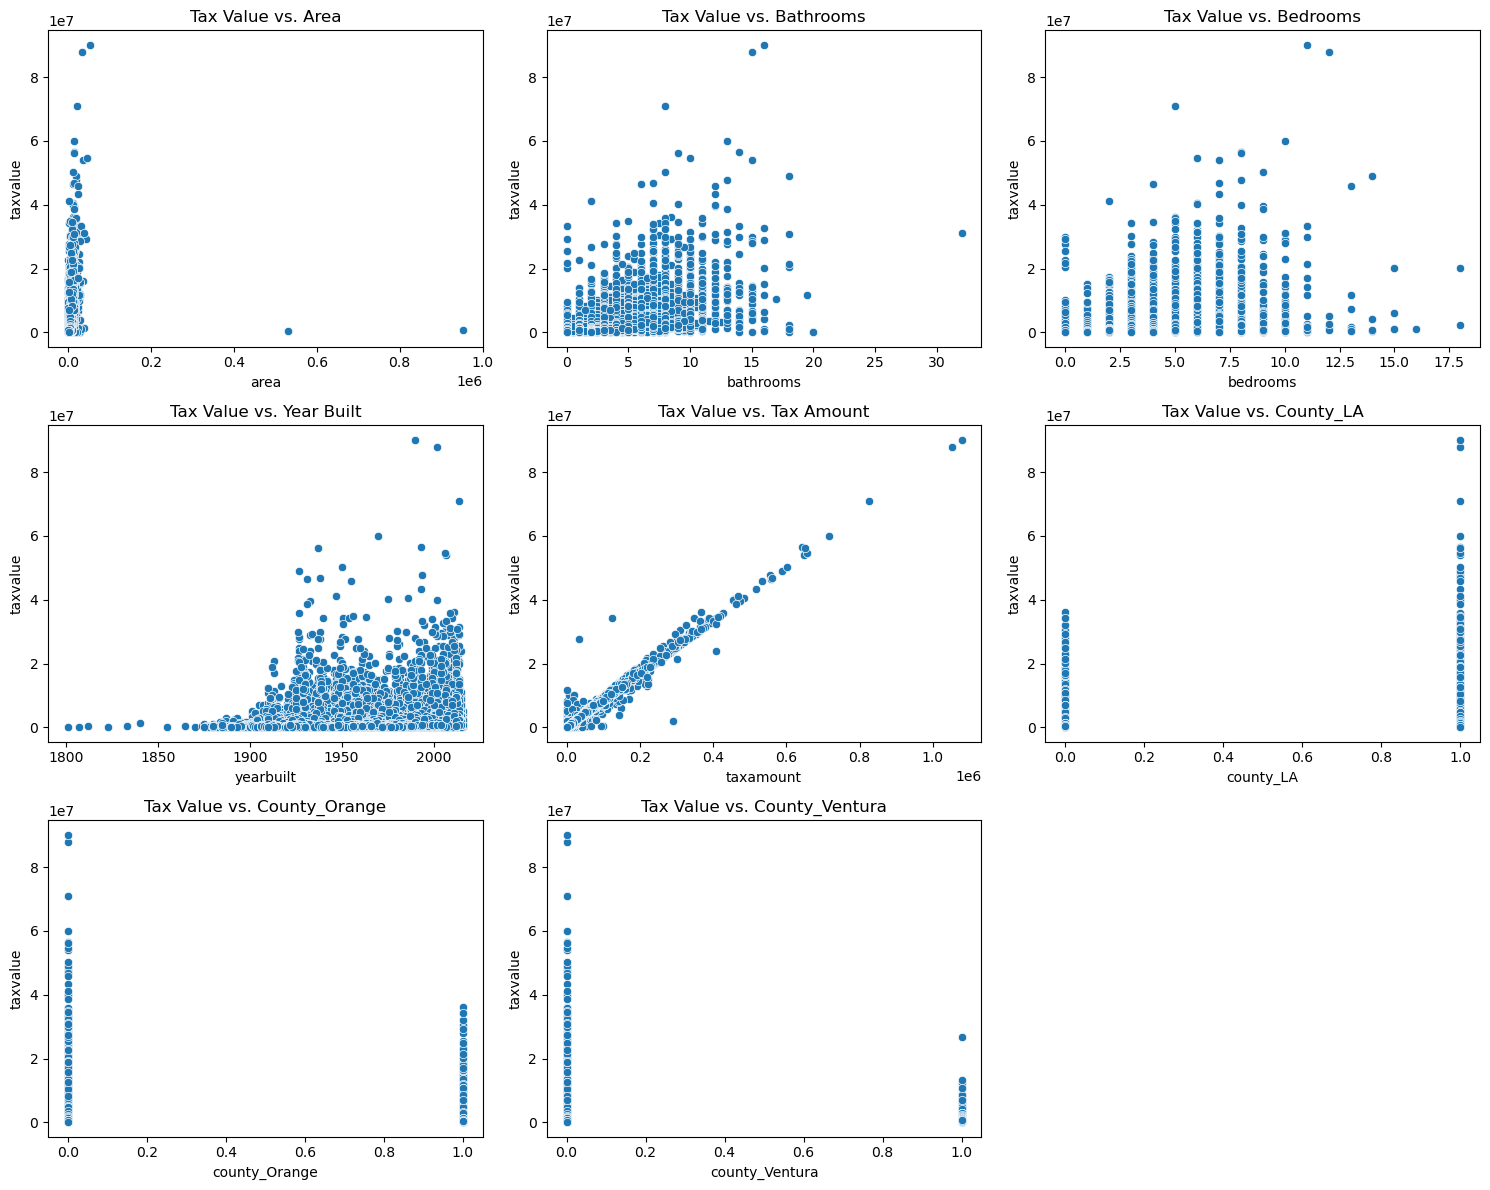

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x3 subplot grid
plt.figure(figsize=(15, 12))

# Scatter Plot 1
plt.subplot(3, 3, 1)
sns.scatterplot(x='area', y='taxvalue', data=train)
plt.title('Tax Value vs. Area')

# Scatter Plot 2
plt.subplot(3, 3, 2)
sns.scatterplot(x='bathrooms', y='taxvalue', data=train)
plt.title('Tax Value vs. Bathrooms')

# Scatter Plot 3
plt.subplot(3, 3, 3)
sns.scatterplot(x='bedrooms', y='taxvalue', data=train)
plt.title('Tax Value vs. Bedrooms')

# Scatter Plot 4
plt.subplot(3, 3, 4)
sns.scatterplot(x='yearbuilt', y='taxvalue', data=train)
plt.title('Tax Value vs. Year Built')

# Scatter Plot 5
plt.subplot(3, 3, 5)
sns.scatterplot(x='taxamount', y='taxvalue', data=train)
plt.title('Tax Value vs. Tax Amount')

# Scatter Plot 6
plt.subplot(3, 3, 6)
sns.scatterplot(x='county_LA', y='taxvalue', data=train)
plt.title('Tax Value vs. County_LA')

# Scatter Plot 7
plt.subplot(3, 3, 7)
sns.scatterplot(x='county_Orange', y='taxvalue', data=train)
plt.title('Tax Value vs. County_Orange')

# Scatter Plot 8
plt.subplot(3, 3, 8)
sns.scatterplot(x='county_Ventura', y='taxvalue', data=train)
plt.title('Tax Value vs. County_Ventura')

plt.tight_layout()
plt.show()


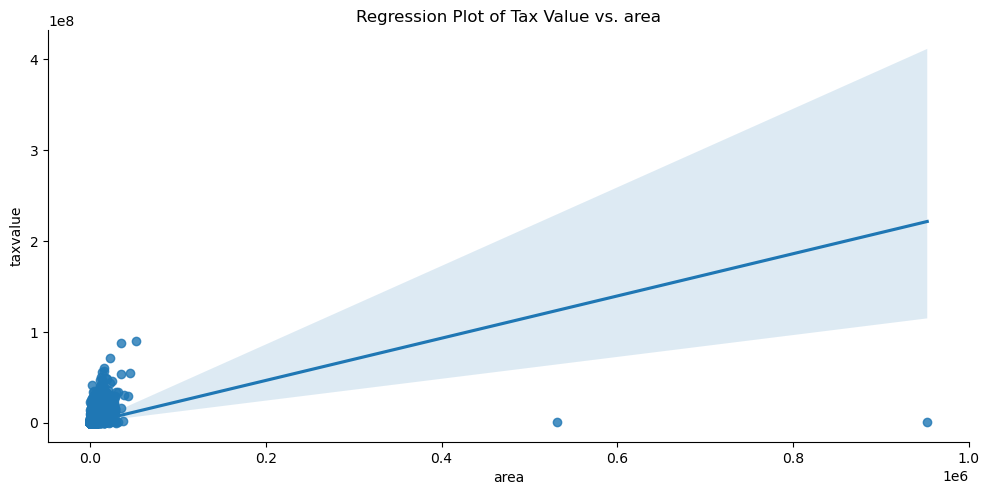

In [38]:
#Regression Plot
sns.lmplot(x='area', y='taxvalue', data=train, aspect=2)
plt.title('Regression Plot of Tax Value vs. area')
plt.show()



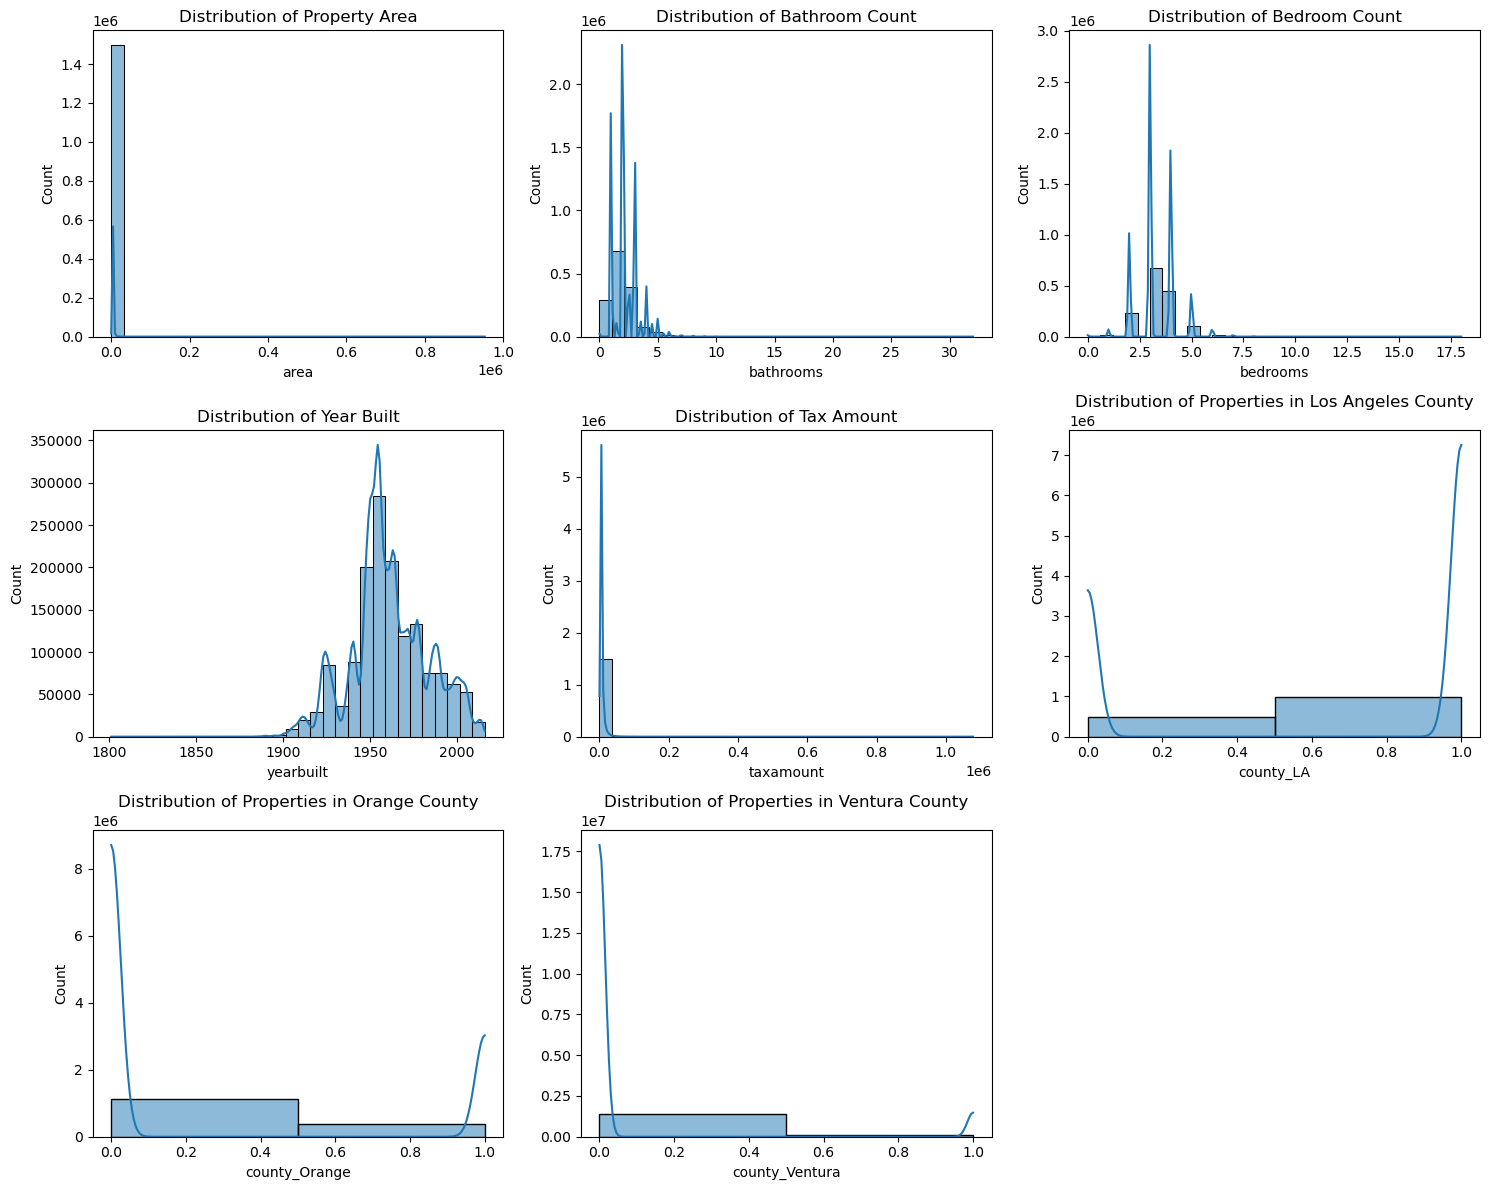

In [46]:
#Exploratory Data Analysis of Property Features
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x3 subplot grid
plt.figure(figsize=(15, 12))

# Histogram and Density Plot 1
plt.subplot(3, 3, 1)
sns.histplot(data=train, x='area', kde=True, bins=30)
plt.title('Distribution of Property Area')

# Histogram and Density Plot 2
plt.subplot(3, 3, 2)
sns.histplot(data=train, x='bathrooms', kde=True, bins=30)
plt.title('Distribution of Bathroom Count')

# Histogram and Density Plot 3
plt.subplot(3, 3, 3)
sns.histplot(data=train, x='bedrooms', kde=True, bins=30)
plt.title('Distribution of Bedroom Count')

# Histogram and Density Plot 4
plt.subplot(3, 3, 4)
sns.histplot(data=train, x='yearbuilt', kde=True, bins=30)
plt.title('Distribution of Year Built')

# Histogram and Density Plot 5
plt.subplot(3, 3, 5)
sns.histplot(data=train, x='taxamount', kde=True, bins=30)
plt.title('Distribution of Tax Amount')

# Histogram and Density Plot 6
plt.subplot(3, 3, 6)
sns.histplot(data=train, x='county_LA', kde=True, bins=2)
plt.title('Distribution of Properties in Los Angeles County')

# Histogram and Density Plot 7
plt.subplot(3, 3, 7)
sns.histplot(data=train, x='county_Orange', kde=True, bins=2)
plt.title('Distribution of Properties in Orange County')

# Histogram and Density Plot 8
plt.subplot(3, 3, 8)
sns.histplot(data=train, x='county_Ventura', kde=True, bins=2)
plt.title('Distribution of Properties in Ventura County')

plt.tight_layout()
plt.show()


In [ ]:
After explore scale the data

In [ ]:
To empirically evaluate the effect of different scaling methods on your machine learning models

In [49]:
# Initialize different scaling methods
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
}

# Initialize your machine learning model
model = LinearRegression()  # You can use your preferred model


In [50]:
#Iterate Through Scaling Methods and Evaluate:
results = {}

# Iterate through each scaling method
for scaler_name, scaler in scalers.items():
    # Fit and transform the scaler on the training data
    X_train_scaled = scaler.fit_transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    X_test_scaled = scaler.transform(X_test)

    # Fit the model on the scaled training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_validate_scaled)

    # Evaluate the model using a suitable metric (e.g., mean squared error)
    mse = mean_squared_error(y_validate, y_pred)

    # Store the results
    results[scaler_name] = mse

# Print the results
for scaler_name, mse in results.items():
    print(f'{scaler_name}: Mean Squared Error = {mse:.2f}')


StandardScaler: Mean Squared Error = 6155809281.87
MinMaxScaler: Mean Squared Error = 6155800871.42
RobustScaler: Mean Squared Error = 6155800567.50


 In this empirical evaluation, all three scaling methods resulted in very similar Mean Squared Errors.Therefore, the choice of scaling method may not have a significant impact on the linear regression model's performance. This suggests that these features may not be particularly sensitive to the scaling method used, which is a good outcome but it's essential to verify the model's performance on the test set to ensure it generalizes well to unseen data. If the test performance is consistent with the validation performance, can use any of these scaling methods for the modeling.

In [51]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'taxvalue', 'yearbuilt', 'taxamount',
       'county_LA', 'county_Orange', 'county_Ventura'],
      dtype='object')

In [55]:
standard_scale_columns = ['bedrooms', 'bathrooms', 'area', 'yearbuilt','county_LA', 'county_Orange', 'county_Ventura']

train = p.standard_scaler(train, standard_scale_columns)
validate = p.standard_scaler(validate, standard_scale_columns)
test = p.standard_scaler(test, standard_scale_columns)

In [56]:
robust_scale_columns = ['taxamount']

train = p.robust_scaler(train, robust_scale_columns)
validate = p.robust_scaler(validate, robust_scale_columns)
test = p.robust_scaler(test, robust_scale_columns)

In [57]:
#To avoid negative values for taxvalue used min_max_scaler
min_max_scale_columns = ['taxvalue']

train = p.min_max_scaler(train, min_max_scale_columns)
validate = p.min_max_scaler(validate, min_max_scale_columns)
test = p.min_max_scaler(test, min_max_scale_columns)

In [58]:
train.head(3)

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county_LA,county_Orange,county_Ventura
1007466,-0.322789,-0.242288,-0.312671,0.002672,0.860076,-0.293396,0.708193,-0.589512,-0.287035
615622,-0.322789,-0.242288,-0.457211,0.002612,-0.359125,-0.279326,0.708193,-0.589512,-0.287035
662507,-0.322789,-1.252068,-0.316475,0.004824,-0.630058,0.288922,0.708193,-0.589512,-0.287035


In [59]:
validate.head(3)

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county_LA,county_Orange,county_Ventura
688607,-0.323189,0.262081,-0.448611,0.002610,1.127265,-0.300048,-1.411776,1.695344,-0.286758
459113,-1.396357,-1.252256,-1.024228,0.001645,-1.803056,-0.598353,0.708328,-0.589851,-0.286758
68307,-2.469526,-1.252256,-1.202370,0.005577,-1.667811,0.389593,0.708328,-0.589851,-0.286758


In [60]:
test.head(3)

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county_LA,county_Orange,county_Ventura
612130,0.743586,1.268367,1.100509,0.012111,0.631939,1.280681,-1.410781,1.695996,-0.287698
1549498,0.743586,0.764158,0.264908,0.004182,1.354547,-0.314753,-1.410781,1.695996,-0.287698
1665091,-0.325148,0.764158,-0.349444,0.005882,1.038406,0.527245,0.708827,-0.589624,-0.287698


In [29]:
test.columns

Index(['bedrooms', 'bathrooms', 'area', 'taxvalue', 'yearbuilt', 'taxamount',
       'county_LA', 'county_Orange', 'county_Ventura'],
      dtype='object')

- Split into our X_train and y_train using our numeric data

In [61]:

X_train = train.drop(columns=['taxvalue','county_LA', 'county_Orange', 'county_Ventura'])
X_validate = validate.drop(columns=['taxvalue','county_LA', 'county_Orange', 'county_Ventura'])
X_test = test.drop(columns=['taxvalue','county_LA', 'county_Orange', 'county_Ventura'])

y_train = train[['taxvalue']]
y_validate = validate[['taxvalue']]
y_test = test[['taxvalue']]

In [31]:
X_train.head(3)

,bedrooms,bathrooms,area,yearbuilt,taxamount
1007466,-0.322789,-0.242288,-0.312671,0.860076,-0.293396
615622,-0.322789,-0.242288,-0.457211,-0.359125,-0.279326
662507,-0.322789,-1.252068,-0.316475,-0.630058,0.288922


In [32]:
y_train.head(3)

,taxvalue
1007466,-0.252086
615622,-0.267681
662507,0.310368


In [33]:

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1498164 entries, 1007466 to 1702727
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   bedrooms   1498164 non-null  float64
 1   bathrooms  1498164 non-null  float64
 2   area       1498164 non-null  float64
 3   yearbuilt  1498164 non-null  float64
 4   taxamount  1498164 non-null  float64
dtypes: float64(5)
memory usage: 100.8 MB


## 3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

## Baseline

In [62]:
baseline = y_train.mean()
baseline

taxvalue    0.005106
dtype: float64

This provides a starting point for assessing the performance of predictive models for property price forecasting. To determine whether it is a good prediction, you should train and evaluate more advanced models and compare their performance to the baseline using appropriate evaluation metrics. The goal is to build models that outperform the baseline and provide more accurate property price predictions.

## evaluate

In [63]:
def metrics_reg(y, yhat):
    """
    send in y_true, y_pred & returns RMSE, R2
    """
    rmse = mean_squared_error(y, yhat, squared=False)
    r2 = r2_score(y, yhat)
    return rmse, r2


In [64]:
#make an array to send into my mean_square_error function
baseline_array = np.repeat(baseline, len(train))
baseline_array[:5]

taxvalue    0.005106
taxvalue    0.005106
taxvalue    0.005106
taxvalue    0.005106
taxvalue    0.005106
dtype: float64

In [65]:
rmse, r2 = metrics_reg(y_train, baseline_array)
rmse, r2

(0.0075375139966091164, 0.0)

In [66]:
metrics_df = pd.DataFrame(data=[
    {
        'model':'baseline',
        'rmse':rmse,
        'r2':r2
    }
    
])
metrics_df

,model,rmse,r2
0,baseline,0.007538,0.0


## Ordinary Least Squares (OLS)

OLS is our standard linear regression algorithm and is computed by minimizing the sum of squared differences in the linear model (residual) with the actual data points



In [67]:
# Creating a Linear regression object
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train[['taxvalue']])

# Make predictions on the training and validation sets
y_train = y_train.assign(pred_lr=lr.predict(X_train))
y_validate = y_validate.assign(pred_lr=lr.predict(X_validate))

# Calculate the RMSE and R2 scores for the model on both the training and validation sets
rmse_tr = mean_squared_error(y_train[['taxvalue']], y_train.pred_lr) ** 0.5
rmse_v = mean_squared_error(y_validate[['taxvalue']], y_validate.pred_lr) ** 0.5
r2_tr = r2_score(y_train.taxvalue, y_train.pred_lr)
r2_v = r2_score(y_validate.taxvalue, y_validate.pred_lr)

# Print the RMSE scores for the model on both the training and validation sets
print(f'LinearRegression')
print(f'RMSE Train: {rmse_tr}\nRMSE Validate: {rmse_v}')
print(f'R2 Train: {r2_tr}\nR2 Validate: {r2_v}')


LinearRegression
RMSE Train: 0.0010028827833825087
RMSE Validate: 0.0012589165674956493
R2 Train: 0.9822971133601242
R2 Validate: 0.9756522581799685


### LassoLars

In [68]:
# Create a LassoLars object with alpha=1 and normalize=False
ll = LassoLars(alpha=1, normalize=False)

# Fit the model to the training data
ll.fit(X_train, y_train[['taxvalue']])

# Make predictions on the training and validation sets
y_train = y_train.assign(pred_ll=ll.predict(X_train))
y_validate = y_validate.assign(pred_ll=ll.predict(X_validate))

# Calculate the RMSE and R2 scores for the model on both the training and validation sets
rmse_tr = mean_squared_error(y_train[['taxvalue']], y_train.pred_ll) ** 0.5
rmse_v = mean_squared_error(y_validate[['taxvalue']], y_validate.pred_ll) ** 0.5
r2_tr = r2_score(y_train.taxvalue, y_train.pred_ll)
r2_v = r2_score(y_validate.taxvalue, y_validate.pred_ll)

# Print the RMSE scores for the model on both the training and validation sets
print('LassoLars')
print(f'RMSE train: {rmse_tr}\nRMSE validate: {rmse_v}')

# Store the RMSE and R2 scores for the model in a dictionary (optional)
metrics_info = {
        'model': 'LassoLars',
        'rmse_train': rmse_tr,
        'rmse_validate': rmse_v,
        'r2_train': r2_tr,
        'r2_validate': r2_v
    }



LassoLars
RMSE train: 0.0075375139966091164
RMSE validate: 0.008079825312752989


## PolynomialFeatures



In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a PolynomialFeatures object with degree=2
pf = PolynomialFeatures(degree=2)

# Transform the training and validation sets to degree 2
X_train_d2 = pf.fit_transform(X_train)
X_validate_d2 = pf.transform(X_validate)  

# Create a LinearRegression object
lp = LinearRegression()

# Fit the model to the training data
lp.fit(X_train_d2, y_train[['taxvalue']]) 
# Make predictions on the training and validation sets
y_train = y_train.assign(pred_lp=lp.predict(X_train_d2))
y_validate = y_validate.assign(pred_lp=lp.predict(X_validate_d2))  

# Calculate the RMSE and R2 scores for the model on both the training and validation sets
rmse_tr = mean_squared_error(y_train[['taxvalue']], y_train.pred_lp) ** 0.5  
rmse_v = mean_squared_error(y_validate[['taxvalue']], y_validate.pred_lp) ** 0.5  
r2_tr = r2_score(y_train.taxvalue, y_train.pred_lp)  
r2_v = r2_score(y_validate.taxvalue, y_validate.pred_lp)  
# Print the RMSE scores for the model on both the training and validation sets
print(f'rmse tr: {rmse_tr}\nrmse v: {rmse_v}')

# Print the RMSE and R2 scores for the model
print(f'Model: PolynomialRegression')
print(f'RMSE (Train): {rmse_tr}')
print(f'RMSE (Validate): {rmse_v}')
print(f'R2 (Train): {r2_tr}')
print(f'R2 (Validate): {r2_v}')


rmse tr: 0.0009888161301562263
rmse v: 0.0012263734725772137
Model: PolynomialRegression
RMSE (Train): 0.0009888161301562263
RMSE (Validate): 0.0012263734725772137
R2 (Train): 0.9827902397044989
R2 (Validate): 0.9768947705533365


## TweedieRegressor (GLM)

In [70]:
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a TweedieRegressor object with power=1 and alpha=0
tweedie_reg = TweedieRegressor(power=1, alpha=0)

# Fit the model to the training data
tweedie_reg.fit(X_train, y_train.taxvalue)  

# Make predictions on the training and validation sets
y_train = y_train.assign(pred_tweedie=tweedie_reg.predict(X_train))
y_validate = y_validate.assign(pred_tweedie=tweedie_reg.predict(X_validate))  

# Calculate the RMSE and R2 scores for the model on both the training and validation sets
rmse_tr = mean_squared_error(y_train[['taxvalue']], y_train.pred_tweedie) ** 0.5 
rmse_v = mean_squared_error(y_validate[['taxvalue']], y_validate.pred_tweedie) ** 0.5  
r2_tr = r2_score(y_train.taxvalue, y_train.pred_tweedie)  
r2_v = r2_score(y_validate.taxvalue, y_validate.pred_tweedie)  

# Print the RMSE scores for the model on both the training and validation sets
print(f'rmse tr: {rmse_tr}\nrmse validate: {rmse_v}')  

# Print the RMSE and R2 scores for the model
print(f'Model: TweedieRegressor')
print(f'RMSE (Train): {rmse_tr}')
print(f'RMSE (Validate): {rmse_v}')
print(f'R2 (Train): {r2_tr}')
print(f'R2 (Validate): {r2_v}')


rmse tr: 0.04311660705536453
rmse validate: 0.05146496980770501
Model: TweedieRegressor
RMSE (Train): 0.04311660705536453
RMSE (Validate): 0.05146496980770501
R2 (Train): -31.721476526978307
R2 (Validate): -39.69005104486087


In [ ]:
Summary:

LinearRegression
RMSE Train: 0.0010028827833825087
RMSE Validate: 0.0012589165674956493
R2 Train: 0.9822971133601242
R2 Validate: 0.9756522581799685

In [ ]:
LassoLars
RMSE train: 0.0075375139966091164
RMSE validate: 0.008079825312752989


In [ ]:
rmse tr: 0.0009888161301562263
rmse v: 0.0012263734725772137
Model: PolynomialRegression
RMSE (Train): 0.0009888161301562263
RMSE (Validate): 0.0012263734725772137
R2 (Train): 0.9827902397044989
R2 (Validate): 0.9768947705533365


rmse tr: 0.04311660705536453
rmse validate: 0.05146496980770501
Model: TweedieRegressor
RMSE (Train): 0.04311660705536453
RMSE (Validate): 0.05146496980770501
R2 (Train): -31.721476526978307
R2 (Validate): -39.69005104486087

It appears that the "PolynomialRegression" model has the best performance on both the training and validation data. 

In [71]:
# Evaluate the final model on test data 
# Transform the test data to degree 2 
X_test_d2 = pf.transform(X_test)

# Make predictions on the test data
y_test['pred_lp'] = lp.predict(X_test_d2)

# Calculate the RMSE and R2 scores for the final model on the test data
rmse_test = mean_squared_error(y_test['taxvalue'], y_test['pred_lp']) ** 0.5
r2_test = r2_score(y_test['taxvalue'], y_test['pred_lp'])

# Print the final model's evaluation metrics on the test data
print(f"Final Model (PolynomialRegression) Test RMSE: {rmse_test}")
print(f"Final Model (PolynomialRegression) Test R2: {r2_test}")


Final Model (PolynomialRegression) Test RMSE: 0.002835979335449007
Final Model (PolynomialRegression) Test R2: 0.9113435636534463


An RMSE of 0.0028 indicates that the model's predictions are close to the actual values, and an R2 score of 0.911 suggests that the model explains a significant portion of the variance in the test data.

These evaluation metrics indicate that "PolynomialRegression" model is a good fit for this data and performs well on unseen data.